# openCV

## Install openCV

In [1]:
!pip install opencv_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 28.8 MB/s eta 0:00:0000:0100:01


## import openCV

In [1]:
import cv2

In [2]:
cv2.version.opencv_version

'4.6.0.66'

## Load image data

In [2]:
imagefile = "./image/lena.jpg"

## check shape
+ color

In [3]:
img = cv2.imread(imagefile)
print(img.shape)
# 가로, 세로, 컬러

(512, 512, 3)


+ gray

In [5]:
# gray
img2 = cv2.imread(imagefile, 0)
print(img2.shape)

(512, 512)


## show data
> ##### MAC은 실행을 멈출 수 없으며, 창을 끌 수도 없다.

In [ ]:
cv2.startWindowThread()
cv2.imshow('lena color', img)
cv2.imshow('lena gray', img2)
cv2.waitKey()
cv2.destroyAllWindows()



## Save Data

In [7]:
cv2.imwrite("./image/Lena.bmp", img)
cv2.imwrite("./image/Lena.png", img)
cv2.imwrite("./image/Lena2.png", img)
cv2.imwrite("./image/Lena2.jpg", img)

True

## color image display
> ##### MAC 유저는 창이 닫히지 않는 이슈를 이 코드로 해결 할 수 있다. 그러나 동영상은 불가능.

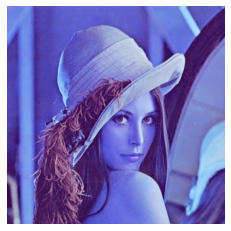

In [10]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread(imagefile)
plt.axis("off")

plt.imshow(img_bgr)
plt.show()

> ###### BGR 이슈 해결

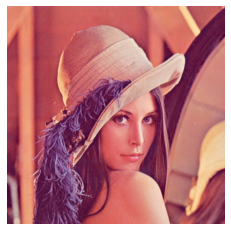

In [13]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.axis("off")

plt.imshow(img_rgb)
plt.show()

## Gray image display
> + ###### interpolation은 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 보일 수 있게 하는 방법
> + ###### imshow()에서는 16가지 보간법이 있고, nearest는 가장 고해상도인 보간법

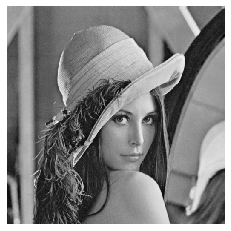

In [14]:
img_gray = cv2.imread(imagefile, cv2.IMREAD_GRAYSCALE)

plt.axis("off")
plt.imshow(img_gray, cmap="gray", interpolation='nearest')
plt.show()

## margin image save

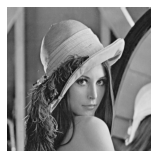

In [15]:
plt.figure(figsize=(4, 4))
plt.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5)

plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.show()

## subplot image display
> + lena, apple, boboon, orange 이미지 2행 2열 표기
>> 해법 :
        subplot(행, 열, 인덱스) 사용
        xticks(), yticks()로 눈금 제거, plt.axis("off")로도 제거 가능.
        plt.figure(figsize=(,)) plt의 사이즈 설정
           

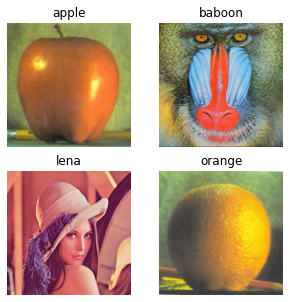

In [53]:
import numpy as np

file_apple = "./image/apple.jpg"
file_baboon = "./image/baboon.jpg"
file_orange = "./image/orange.jpg"

apple = cv2.imread(file_apple)
baboon = cv2.imread(file_baboon)
orange = cv2.imread(file_orange)

img_apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
img_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
img_orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

img_list=[img_apple, img_baboon, img_rgb, img_orange]
title_list=["apple", "baboon", "lena", "orange"]

plt.figure(figsize=(5,5))

for index, i in enumerate(img_list):
    plt.subplot(2,2,index+1)
    plt.imshow(img_list[index])
    plt.title(title_list[index])
    plt.axis('off')

plt.show()

## Video input and display
> + ###### MAC은 종료되지 않는다.
+ ###### VideoCapture(0) : CPU의 카메라
<br>

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("./image/vtest.avi")
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(25)
    
    if key == 27:
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

## 영상 입출력과 디스플레이

* ###### 영상 입력
    * cv2.imread(filename[, flags]) → retval
* ###### 영상 파일 출력
    * cv2.imwrite(filename, img[, params]) → retval
* ###### 윈도우 생성
    * cv2.namedWindow(winname[, flags])
* ###### 윈도우 표시
    * cv2.imshow(winname, mat)
* ###### 키보드 입력 대기 
    * cv2.waitKey([, delay]) → retval
* ###### 윈도우 파괴
    * cv2.destroyWindow(winname)
    * cv2.destroyAllWindow()
* ###### 비디오 획득 객체 생성
    * cv2.VideoCapture() → <VideoCatpure object>
    * cv2.VideoCapture(filename) → <VideoCatpure object>
    * cv2.VideoCapture(device) → <VideoCatpure object>
    * device = 0, 1, …
* ###### 프레임 획득
    * cv2.VideoCapture.read([image]) → retval, image
* ###### 프레임 잡기
    * cv2.VideoCapture.grab() → retval
* ###### 프레임 획득
    * cv2.VideoCapture.retrieve([image[, channel]]) → retval, image
* ###### 비디오 획득 객체 해제
    * cv2.VideoCapture.release()
* ###### 비디오 특성 얻기
    * cv2.VideoCapture.get(propid) → retval
* ###### 비디오 특성 설정
    * cv2.VideoCapture.set(propid, value) → retval
* ###### 비디오 출력 객체 생성
    * cv2.VideoWriter([filename, fourcc, fps, frameSize[,isColor]]) → <VideoWriter object>
* ###### 비디오 파일에 이미지 출력
    * cv2.VideoWriter.write(image)
* ###### 비디오 출력 객체 해제
    * cv2.VideoWriter.release()


# 그리기

## 선 그리기
> ###### white 배경 생성 및 pt1-pt2(Red), pt1-pt3(Blue)를 잇는 선 그리기 <br><br> cv2.line(배경, 좌표1, 좌표2, BGR value, line width) 으로 선 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt2 = 500, 0
pt3 = 0, 500

cv2.line(img, pt1, pt2, (255,0,0), 5)
cv2.line(img, pt1, pt3, (0,0,255), 5)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 사각형 그리기
> ###### white 배경 생성 및 pt1-pt4로 사각형 그리기 <br><br> cv2.rectangle(배경, 좌표1, 좌표2, BGR value, line width)으로 사각형 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt4 = 400, 400

cv2.rectangle(img, pt1, pt4, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 선과 사각형 그리기

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt2 = 500, 0
pt3 = 0, 500
pt4 = 400, 400

cv2.line(img, pt1, pt2, (255,0,0), 5)
cv2.line(img, pt1, pt3, (0,0,255), 5)
cv2.rectangle(img, pt1, pt4, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## clipline
> ###### white 배경 생성 및 pt1-pt4로 사각형 그리기 <br><br> cv2.clipline(검충 하려는 직사각형 영역, 직선의 시작점, 직선의 종료점, retval, 사각형 안에 있는 선의 시작점, 사각형 안에 있는 선의 종료점)으로 사각형 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 120, 50
pt2 = 300, 500

x1, x2, y1, y2 = 100, 400, 100, 400

cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255))
cv2.line(img, pt1, pgt2, (255, 0, 0), 2)
imgRect = (x1, y1, x2-x1, y2-y1)
cv2.clipLine(imRect, pt1, pt2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## circle
> circle() 함수로 구현 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

cx = img.shape[0]//2
cy = img.shape[1]//2

cv2.circle(img,(cx, cy), 200, (0,0,255))
cv2.circle(img,(cx, cy), 100, (0,0,255))
cv2.circle(img,(cx, cy), 10, (255,0,0))
cv2.circle(img,(cx, cy), 1, (0,0,1))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## Ellipse
> ellipse() 함수로 구현 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

cx = img.shape[0]//2
cy = img.shape[1]//2

cv2.ellipse(img,(cx, cy), (90, 50), 50, 50, 360, (0,0,255))
cv2.ellipse(img,(cx, cy), (90, 50), -50, 50, 360, (255,0,0))
cv2.ellipse(img,(cx, cy), (90, 50), 50, -50, 360, (0,255,0))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## Ellipse(box)
> ellipse() 함수로 구현 가능 <br> box option 이용

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

center = img.shape[0]//2, img.shape[1]//2
size = 200, 100
box = (center, size, 0)
cv2.ellipse(img, box, (255, 0, 0), 5)
box = (center, size, 45)
cv2.ellipse(img, box, (0, 0, 255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## polylines()
> 여러개의 좌표를 지정하여 다각형을 구현합니다.

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pts1 = np.array([[100, 200], [200, 200], [200, 100], [100, 100]])
pts2 = np.array([[300, 200], [400, 200], [400, 100]]) # 3개의 포인트 지정
cv2.polylines(img, [pts1], True, (255,0,0), 2)
cv2.polylines(img, [pts2], True, (255,0,0), 2)

pts3 = np.array([[100, 400], [200, 400], [200, 300], [100, 300]])
cv2.polylines(img, [pts3], False, (0,0,255), 2)

cv2.imshow('polylines', img )
cv2.waitKey()
cv2.destroyAllWindows()


## ellipse2Poly()

> delta각의 의하여 연결되는 선들을 이용하여 원에 가까운 다각형을 그릴 수 있다. delta를 제외한 파라미터는 elipse와 동일하다. <br> delta(각도)값이 작아질 수 록 좌표가 많아진다.

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
ptCenter = img.shape[0]//2, img.shape[1]//2
size = 200, 100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (0,255,0))
pts1 = cv2.ellipse2Poly(ptCenter, size, 0, 0, 360, delta = 50)
cv2.polylines(img, [pts1], False, (255,0,0), 2)

cv2.ellipse(img, ptCenter, size, 90, 0, 360, (0,0,255))
pts2 = cv2.ellipse2Poly(ptCenter, size, 90, 0, 360, delta = 50)
cv2.polylines(img, [pts2], False, (0,255,0), 2)

cv2.imshow('polylines', img)
cv2.waitKey()
cv2.destroyAllWindows()

## rotated rectangle
> angle을 변경 다양한 각도로 사각형 생성

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
x, y, size, angle = 150, 250, 100, 45

rect = ((x,y),(size,size), angle)
box = cv2.boxPoints(rect).astype(np.int32)

print('box = ', box)

r, g, b = np.random.randint(256), np.random.randint(256), np.random.randint(256

cv2.polylines(img, [box], True, (r,g,b), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

box =  [[ 79 250]
 [150 179]
 [220 250]
 [150 320]]


## Utilize repeat statements

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
x, y, size = 150, 250, 100

for angle in range(0, 90, 10) :
    rect = ((x,y),(size,size), angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    r, g, b = np.random.randint(256), np.random.randint(256), np.random.randint(256)
    cv2.polylines(img, [box], True, (r,g,b), 1)
    
print('box = ', box)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

box =  [[ 92 209]
 [190 192]
 [207 290]
 [109 307]]


## fillConvexPoly()
> 채워진 블록 다각형을 그리는 함수
## fillPoly()
> 채워진 다각형을 그리는 함수

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

pts1 = np.array([[100, 200], [200, 200], [200, 100], [100, 100]])
pts2 = np.array([[300,200], [400,200], [400,100]])

cv2.fillConvexPoly(img, pts1, (255,0,0))
cv2.fillPoly(img, [pts2], (0,0,255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows() 

## fillPoly()으로 ploygon 구현
> 2개의 다각형 구현

In [ ]:
import cv2
import numpy as np

img1 = np.zeros(shape=(400, 400, 3), dtype=np.uint8)
img2 = np.zeros(shape=(400, 400, 3), dtype=np.uint8)

pt1 = np.array([[100, 100], [270, 110], [300, 330], [170, 170], [150, 250]], np.int32)

cv2.fillConvexPoly(img1, pt1, (255,0,0))
cv2.fillPoly(img2, [pt1], (0,0,255))

cv2.imshow('convex', img1)
cv2.imshow('poly', img2)
cv2.waitKey()
cv2.destroyAllWindows()

# 문자열 출력 함수

## getTextSize
> 문자열 출력 크기를 반환하는 함수

## putText
> 문자열을 출력하는 함수

In [7]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
text = 'OpenCV Programming.'

org = (50,100)
fontScale = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, text, org, fontScale, 1,(0,0,255))
size, baseLine = cv2.getTextSize(text, fontScale, 1, 1)

print('size = ', size)
print("baseLine= ", baseLine)

cv2.rectangle(img, org, (org[0]+size[0], org[1]-size[1]), (255,0,0))
cv2.circle(img, org, 3, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey(300)
cv2.destroyAllWindows()



size =  (354, 22)
baseLine=  10


# 이벤트 처리
## 키보드 이벤트 처리
### waitKey()
> OpenCV에서 키 입력을 확인하기 위한 함수

In [ ]:
import cv2
import numpy as np

width, height = 512, 512
x, y, R = 256, 256, 50
left, right, down, up = 2,0,1,3
direction = down

# 윈도우 기준 방향키 전환, 맥 적용 안됨.
while True : 
    key = cv2.waitKeyEx(1000)
    if key == 0x1B : break
    elif key == 0x270000 : direction = 0 # right
    elif key == 0x260000 : direction = 1 # down
    elif key == 0x250000 : direction = 2 # left
    elif key == 0x280000 : direction = 3 # up
        
    if direction == 0 : x+=5
    elif direction == 1 : y-=5
    elif direction == 2 : x-=5
    elif direction == 3 : y+=5
        
    if x < R : direction = 0
    if x > width - R : direction = 2
    if y < R : direction = 1
    if y > height - R : direction = 3

    img = np.zeros(shape=(width, height, 3), dtype=np.uint8) + 255
    cv2.circle(img,(x,y),R,(0,0,255),-1)
    cv2.imshow('img',img)
cv2.destroyAllWindows()


## 마우스 이벤트 처리
### cv2.setMouseCallback(windowName, callback, param=None)
> 좌클릭, 우클릭, 쉬프트 클릭별 도형 생성

In [ ]:
import cv2
import numpy as np

def on_mouse(event, x, y, flags, param) : 
    if event == cv2.EVENT_LBUTTONDOWN : 
        if flags & cv2.EVENT_FLAG_SHIFTKEY :
            cv2.rectangle(img, (x-5, y-5), (x+5, y+5), (0,255,0))
        else : 
            cv2.circle(img,(x, y), 10, (255,0,0),3)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(param[0], (x, y), 10, (0,0,255),3)
    cv2.imshow('img', param[0])
    
img = np.zeros((512, 512, 3), np.uint8) + 255

cv2.imshow('img', img)

cv2.setMouseCallback('img', on_mouse, [img])
cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 이벤트 처리
> cv2.CreateTrackbar <br> 원하는 RGB값 화면 시각화

In [ ]:
import cv2
import numpy as np


def on_change(pos) :
    global img
    r = cv2.getTrackbarPos('R', 'img')
    g = cv2.getTrackbarPos('G', 'img')
    b = cv2.getTrackbarPos('B', 'img')
    img[:] = (b,g,r)
    cv2.imshow('img', img)
    
img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('img', img)
cv2.createTrackbar('R', 'img', 0,255,on_change)
cv2.createTrackbar('G', 'img', 0,255,on_change)
cv2.createTrackbar('B', 'img', 0,255,on_change)

cv2.setTrackbarPos('R', 'img', 0)
cv2.setTrackbarPos('G', 'img', 0)
cv2.setTrackbarPos('B', 'img', 0)
cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 이미지 처리 2
> 투명도 조절

In [3]:
import cv2
import numpy as np

images1 = "./image/lena.jpg"
images2 = "./image/baboon.jpg"

img1 = 0
img2 = 0
img3 = 0

def on_change(pos) :
    n = cv2.getTrackbarPos('alpha', 'image')
    print('n=', n)
    
    alpha = n/100
    print('alpha=', alpha)
    
    img3 = np.uint8((alpha*img2 + (1-alpha) * img1))
    cv2.imshow('img', img3)
    
img1 = cv2.imread(images1)
img2 = cv2.imread(images2)
img3 = img1.copy()

cv2.imshow('image', img3)
cv2.createTrackbar('alpha', 'image', 0,100, on_change)

cv2.setTrackbarPos('alpha', 'image', 0)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상 접근법
## 화소 접근 방법


In [4]:
import cv2
import numpy as np

img = cv2.imread("./image/lena.jpg")
print('img.ndm =', img.ndim)
print('img.shape =', img.shape)
print('img.dtype =', img.dtype)

img = img.astype(np.int32)
print('img.dtype =', img.dtype)

img=np.uint8(img)
print('img.dtype =', img.dtype)

img.ndm = 3
img.shape = (512, 512, 3)
img.dtype = uint8
img.dtype = int32
img.dtype = uint8


> 데이터 프레임으로 시각화

In [28]:
import pandas as pd
img = cv2.imread('./image/Lena2.jpg', 0)
df = pd.DataFrame(img)
df

0    1    2    3    4    5    6    ...  505  506  507  508  509  510  511
0    163  162  161  160  163  156  164  ...  166  167  173  173  168  156  129
1    162  162  162  161  164  156  163  ...  165  163  169  174  173  157  125
2    162  163  163  161  163  156  164  ...  166  168  169  169  169  156  127
3    162  164  163  160  163  156  164  ...  161  171  171  170  170  158  132
4    164  164  162  159  162  156  164  ...  160  170  172  175  172  154  124
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
507   52   50   55   48   52   51   51  ...   77   84   88   95   97   93   91
508   49   46   51   44   51   49   49  ...   82   90   94  100  102   98   95
509   43   41   51   46   55   50   49  ...   85   92   96  101  102  100   99
510   41   42   55   50   57   49   49  ...   93   98  104  104  104  105  107
511   42   44   58   50   53   45   48  ...   93   98  104  103  101  105  109

[512 rows x 512 columns]

### 타입을 변경하여 이미지 변경 유무 확인

In [ ]:
import cv2
import numpy as np

img = cv2.imread("./image/lena.jpg", cv2.IMREAD_GRAYSCALE)
img = img.flatten()
img = img.reshape(512, 512)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()